In [2]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

## Homework 3 
##### The CDC Social Vulnerability Index (SVI) takes multiple differen population-level inputs (e.g., % of the population living in poverty, % of the population without health insurance) to identify particularly vulnerable counties. While the CDC SVI scores rely on adding up the percentiles of various characteristics, there are alternative indexes (e.g., [University of South Carolina SoVI index](https://sc.edu/study/colleges_schools/artsandsciences/centers_and_institutes/hvri/data_and_resources/sovi/index.php)) that use methods like PCA.Here, we are going to use the CDC SVI data to create an alternative index based on PCA.

In [3]:
NRI = pd.read_csv('NRI_Table_Counties.csv', dtype={'STCOFIPS': str})
NRI = NRI.fillna(0)

SVI = pd.read_csv('SVI_2022_US_county.csv', dtype={'FIPS':str})
SVI = SVI.fillna(0)

Merge_SVI_NRI = pd.merge(NRI, SVI, left_on='STCOFIPS', right_on='FIPS', how= 'outer')
Merge_SVI_NRI = Merge_SVI_NRI.fillna(0)

##### The following variables are used in the SVI:
##### `EP_POV150, EP_UNEMP, EP_HBURD, EP_NOHSDP, EP_UNINSUR, EP_AGE65, EP_AGE17, EP_DISABL, EP_SNGPNT, EP_LIMENG, EP_MINRTY, EP_MUNIT, EP_MOBILE, EP_CROWD, EP_NOVEH, EP_GROUPQ, EP_NOINT`

In [4]:
col_for_pca = [
    "EP_POV150", "EP_UNEMP", "EP_HBURD", "EP_NOHSDP", "EP_UNINSUR", 
    "EP_AGE65", "EP_AGE17", "EP_DISABL", "EP_SNGPNT", "EP_LIMENG", 
    "EP_MINRTY", "EP_MUNIT", "EP_MOBILE", "EP_CROWD", "EP_NOVEH", 
    "EP_GROUPQ", "EP_NOINT"
]

Merge_SVI_NRI_pca = Merge_SVI_NRI[col_for_pca]
Merge_SVI_NRI_pca

,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,EP_NOINT
0,20.2,2.8,19.7,9.6,7.4,15.6,23.4,16.4,5.6,0.4,27.4,3.9,15.6,1.4,4.0,0.9,10.9
1,18.3,3.4,23.2,8.4,9.3,21.2,21.2,13.9,4.2,0.8,17.7,16.6,10.2,1.9,2.3,1.5,10.9
2,37.7,5.8,25.1,23.5,10.7,19.8,20.7,18.1,11.3,2.0,55.4,1.4,29.2,3.8,11.7,12.0,31.8
3,29.0,8.7,23.2,21.1,8.4,16.8,21.2,19.6,7.2,0.3,25.8,2.7,30.6,1.3,7.5,6.4,20.2
4,22.9,6.0,19.4,18.2,10.2,18.3,23.0,17.0,5.3,2.2,14.3,0.9,23.9,2.3,4.8,1.0,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3238,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##### Note: Typically variables should be standardized to have mean 0 and variance 1 before performing PCA. Most software packages for performing PCA automatically do this or include this as a function argument. Check the function / package documentation to determine whether this standardization is happening and standardize the data if it is not automatic.

In [5]:
standardized = StandardScaler()
standardized_data = standardized.fit_transform(Merge_SVI_NRI_pca)
standardized_df = pd.DataFrame(standardized_data, columns=Merge_SVI_NRI_pca.columns)
standardized_df

,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,EP_AGE65,EP_AGE17,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,EP_NOINT
0,-0.330535,-0.777697,-0.241896,-0.285066,-0.348230,-0.604496,0.422643,0.132227,0.013707,-0.437720,0.140476,-0.143970,0.394735,-0.379533,-0.412078,-0.571979,-0.758737
1,-0.536793,-0.544926,0.319685,-0.486133,0.013107,0.357219,-0.009413,-0.343918,-0.529791,-0.284449,-0.336030,2.002356,-0.175655,-0.166060,-0.791841,-0.432828,-0.758737
2,1.569207,0.386154,0.624543,2.043952,0.279356,0.116790,-0.107608,0.456006,2.226522,0.175362,1.515955,-0.566475,1.831275,0.645134,1.308022,2.002314,1.971787
3,0.624764,1.511210,0.319685,1.641819,-0.158053,-0.398414,-0.009413,0.741692,0.634848,-0.476038,0.061877,-0.346772,1.979154,-0.422227,0.369786,0.703571,0.456281
4,-0.037432,0.463744,-0.290031,1.155909,0.184267,-0.140812,0.344087,0.246502,-0.102757,0.251998,-0.503052,-0.650976,1.271447,0.004717,-0.233366,-0.548787,0.025146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3235,-2.523380,-1.863957,-3.402790,-1.893597,-1.755545,-3.283560,-4.172868,-2.991282,-2.160286,-0.590991,-1.205529,-0.803078,-1.253060,-0.977255,-1.305637,-0.780706,-2.182791
3236,-2.523380,-1.863957,-3.402790,-1.893597,-1.755545,-3.283560,-4.172868,-2.991282,-2.160286,-0.590991,-1.205529,-0.803078,-1.253060,-0.977255,-1.305637,-0.780706,-2.182791
3237,-2.523380,-1.863957,-3.402790,-1.893597,-1.755545,-3.283560,-4.172868,-2.991282,-2.160286,-0.590991,-1.205529,-0.803078,-1.253060,-0.977255,-1.305637,-0.780706,-2.182791
3238,-2.523380,-1.863957,-3.402790,-1.893597,-1.755545,-3.283560,-4.172868,-2.991282,-2.160286,-0.590991,-1.205529,-0.803078,-1.253060,-0.977255,-1.305637,-0.780706,-2.182791


##### Perform PCA

In [6]:
# Perform PCA
pca = PCA() 
SVI_pca_result = pca.fit_transform(standardized_data)

# Convert to dataframe for better viewing
pca_df = pd.DataFrame(SVI_pca_result)
# print(pca_df)

# See the loadings 
explained_variance_ratio = pca.explained_variance_ratio_
print('Variance_Ratio', explained_variance_ratio)
print('------------------------------')
print('Cumulative Variance Ratio', explained_variance_ratio.cumsum())

# Extract the first three principal components
components = pca.components_[:3] 
variable_names = Merge_SVI_NRI_pca.columns

Variance_Ratio [0.33805606 0.16255378 0.09332575 0.07113107 0.05617679 0.05009247
 0.04108385 0.03099315 0.02907729 0.02593005 0.0219471  0.01890599
 0.01708647 0.01404918 0.01220545 0.00904321 0.00834234]
------------------------------
Cumulative Variance Ratio [0.33805606 0.50060984 0.59393559 0.66506666 0.72124345 0.77133592
 0.81241977 0.84341292 0.87249021 0.89842026 0.92036736 0.93927335
 0.95635982 0.970409   0.98261445 0.99165766 1.        ]


##### Plot the eigenvectors or loadings associated of the first three principal components. Make sure that the axis labels correspond to the variable names and not the indices of the variables. How would you interpret the first three prinicpal components? Note: you can find the documentation for the SVI variables [here](https://www.atsdr.cdc.gov/placeandhealth/svi/documentation/SVI_documentation_2022.html).

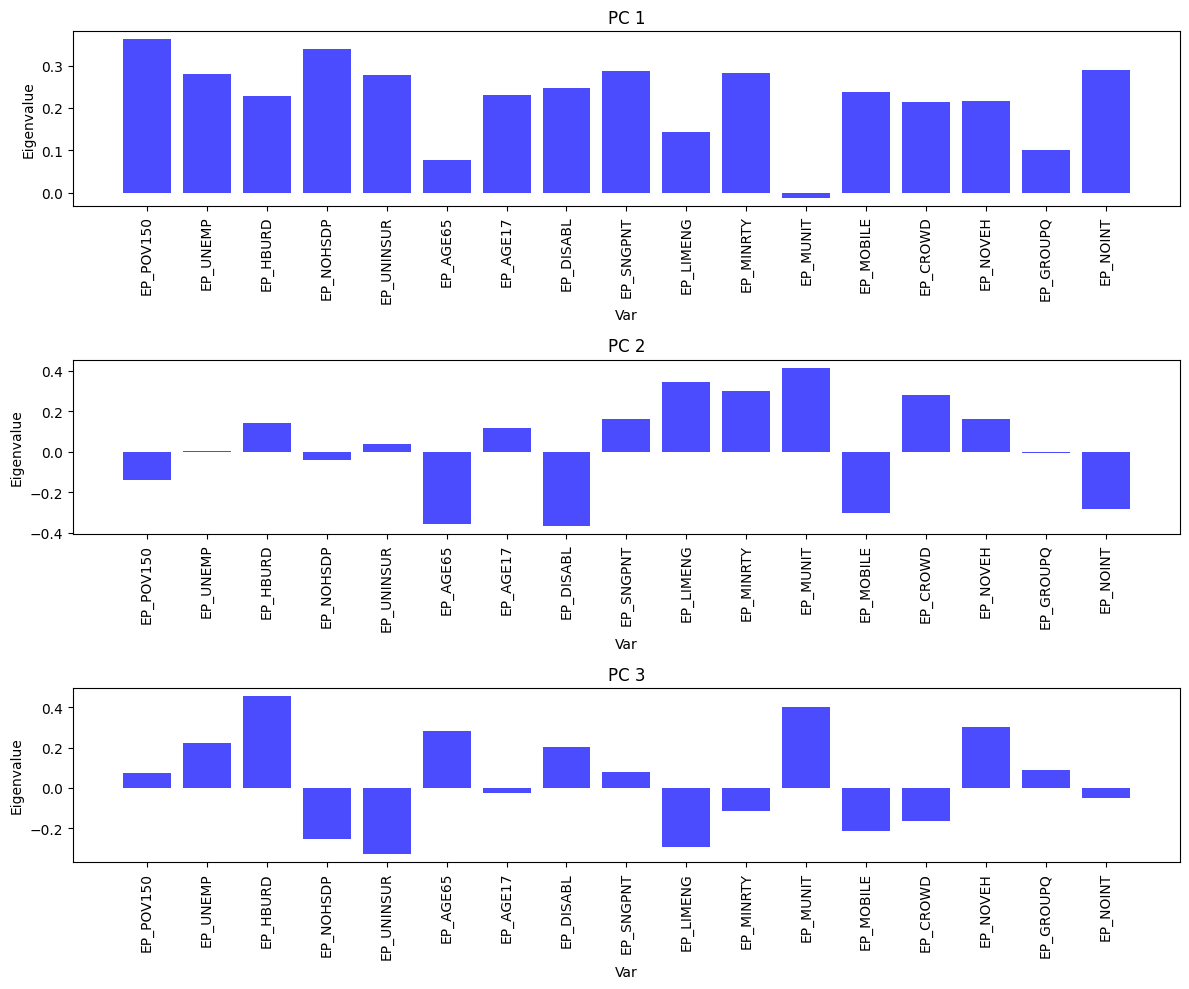

In [16]:
fig, ax = plt.subplots(3, 1, figsize=(12, 10))

for i in range(3):
    ax[i].bar(variable_names, components[i], color='blue', alpha=0.7)
    ax[i].set_title(f'PC {i+1}')
    ax[i].set_xlabel('Var')
    ax[i].set_ylabel('Eigenvalue')
    ax[i].set_xticks(np.arange(len(variable_names)))
    ax[i].set_xticklabels(variable_names, rotation=90)

plt.tight_layout()
plt.show()

##### There are several different ways to determine the number of principal components to retain. One common method is to retain principal components that explain a certain percentage of the variance in the data. a. How many principal components are needed to explain 80% of the variance in the data? b. How many principal components are needed to explain 90% of the variance in the data?

In [17]:
print(explained_variance_ratio.cumsum())
print("--------------------")
print("The result shows that we need at least 7 PCs to explain 80 % of the variation")
print("--------------------")
print("The result shows that we need at least 10 PCs to explain 90 % of the variation")

[0.33805606 0.50060984 0.59393559 0.66506666 0.72124345 0.77133592
 0.81241977 0.84341292 0.87249021 0.89842026 0.92036736 0.93927335
 0.95635982 0.970409   0.98261445 0.99165766 1.        ]
--------------------
The result shows that we need at least 7 PCs to explain 80 % of the variation
--------------------
The result shows that we need at least 10 PCs to explain 90 % of the variation


##### An alternative approach is to plot the eigenvalues of the principal components and retain the components that are above the "elbow" in the plot. In other words the eigenvalues that are substantially larger than the rest. a. Create a [scree plot](https://en.wikipedia.org/wiki/Scree_plot) of the eigenvalues of the principal components.a. How many principal components should be retained based on the scree plot? This video may help: [PCA Scree Plot](https://youtu.be/vFUvNICWVz4?si=6NbyRcLRGT8L1HzI)

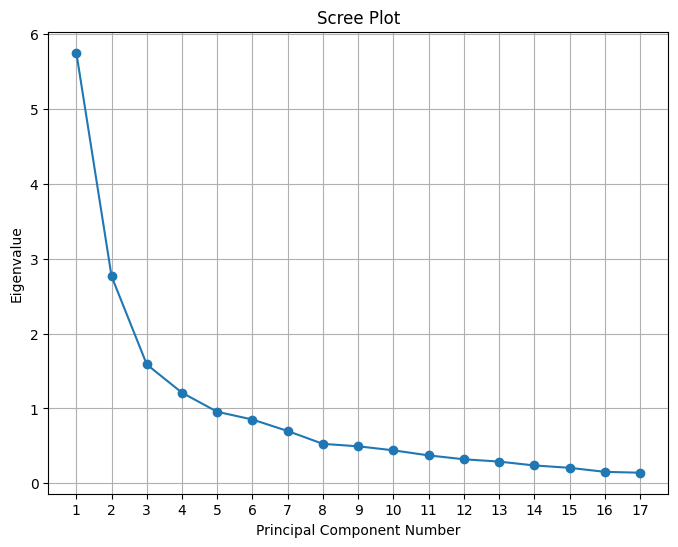

It looks like starting point 8, the drop in component taper off, so I would say we retain 1 to 7


In [18]:
# Call the eigenvalues
eigenvalues = pca.explained_variance_

# Scree plot
plt.figure(figsize=(8,6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker = 'o', linestyle='-')
plt.title('Scree Plot')
plt.xlabel('Principal Component Number')
plt.ylabel('Eigenvalue')
plt.grid(True)
plt.xticks(np.arange(1, len(eigenvalues) + 1))
plt.show()

print("It looks like starting point 8, the drop in component taper off, so I would say we retain 1 to 7")